**1: What is Simple Linear Regression?**
Simple linear regression is machine learning algorithm which is used to model the relationship between one independent and one dependent variable by approximating it to a linear equation

**What are the key assumptions of Simple Linear Regression?**
These are the assumption of simple linear regression.
Linearity
Homoscedasticity
Error should be normally distribution
No multicollinearity
indpendent of error.

** 3: What is heteroscedasticity, and why is it important to address in regression models?**
Hetroscedasticity refers to variance of residual is not constant across all level of independent variable.

** 4: What is Multiple Linear Regression?**
Multiple linear regression states the relationship between one dependent variable with multiple independent variable and approximate it to linear relationship

** 5: What is polynomial regression, and how does it differ from linear
regression?**
Polynomial regression is ML algorithm which states the relationship between variables when they are curved or nonlinear meaning linear approximation is not enought to capture the entire dataset i.e dataset is complex.





coefficeient is:  [1.98]
Intecept is:  0.17999999999999794
Predicted value is:  [ 2.16  4.14  6.12  8.1  10.08]


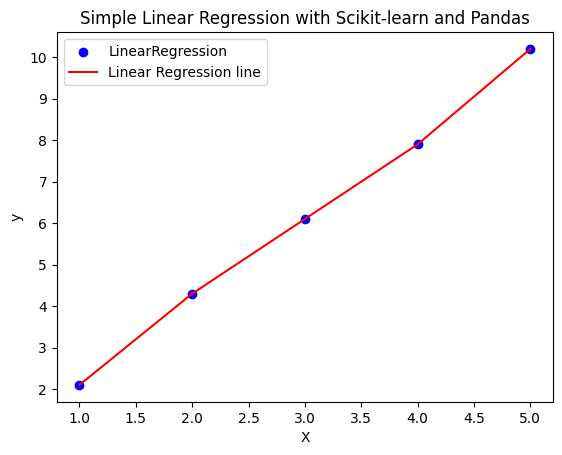

In [7]:
''': Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]'''

X = [1, 2, 3, 4, 5]
Y = [2.1, 4.3, 6.1, 7.9, 10.2]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = {'X':[1, 2, 3, 4, 5],'Y':[2.1, 4.3, 6.1, 7.9, 10.2]}

df = pd.DataFrame(data)
df.head()

from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = df[['X']]
y = df['Y']

model.fit(X,y)
print("coefficeient is: ", model.coef_)
print("Intecept is: ", model.intercept_)
print("Predicted value is: ", model.predict(X))

plt.scatter(X,y, color ='blue',label ='LinearRegression')
plt.plot(X,y, color = 'red', label = "Linear Regression line")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression with Scikit-learn and Pandas')
plt.legend()
plt.show()

In [11]:
'''
Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)
df.head()

X = df[['Area','Rooms']]
y = df['Price']

from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(X,y)

print("coefficent is : ", model.coef_)
print("intercept is : ", model.intercept_)
print("prediction is : ", model.predict(X))

vif = pd.DataFrame()
vif['Feature'] = df.columns
vif

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif

coefficent is :  [   63.15789474 34736.84210526]
intercept is :  103157.89473684214
prediction is :  [248421.05263158 302105.26315789 321052.63157895 368421.05263158]


,Feature,VIF
0,Area,382.737616
1,Rooms,130.623835
2,Price,312.248651


Intercept: 0.06
Coefficients: [0.   1.94 0.2 ]
Prediction: [ 2.2   4.74  7.68 11.02 14.76]


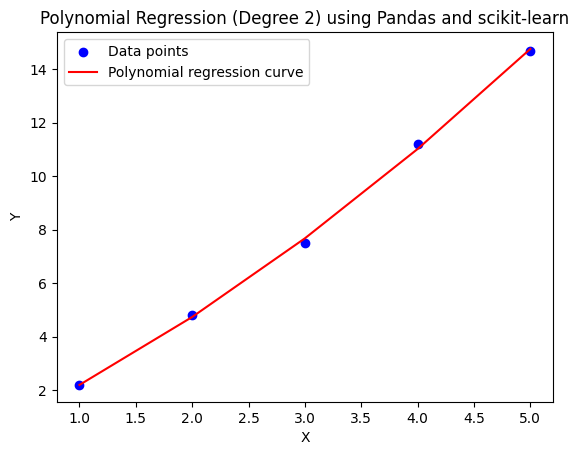

In [12]:
'''8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.'''


import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [2.2, 4.8, 7.5, 11.2, 14.7]
}


df = pd.DataFrame(data)


X = df[['X']]
Y = df['Y']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)


Y_pred = model.predict(X_poly)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {model.coef_}")
print(f"Prediction: {Y_pred}")



plt.scatter(df['X'], df['Y'], color='blue', label='Data points')
plt.plot(df['X'], Y_pred, color='red', label='Polynomial regression curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2) using Pandas and scikit-learn')
plt.legend()
plt.show()



Intercept: 166.50
Coefficients: [-2.85]
Prediction: [138.  109.5  81.   52.5  24. ]


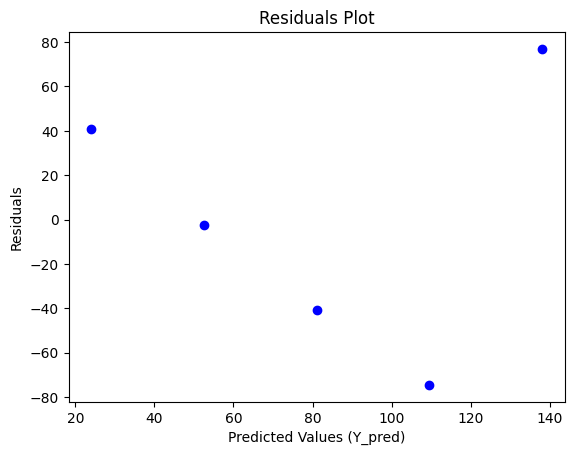

In [15]:
''' Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = {
    'X': [10, 20, 30, 40, 50],
    'Y': [215, 35, 40, 50, 65]
}

df = pd.DataFrame(data)

X = df[['X']]
y = df['Y']

model = LinearRegression()

model.fit(X,y)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {model.coef_}")
print(f"Prediction: {model.predict(X)}")

y_pred = model.predict(X)

residuals = y - y_pred

plt.scatter(y_pred, residuals, color='blue')
plt.xlabel('Predicted Values (Y_pred)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

**10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.However, you detect heteroscedasticity and multicollinearity in your regressionmodel. Explain the steps you would take to address these issues and ensure a robust model.**

To address the heteroscedasticity where variance is not consistent across independent variable i will do independent variable transformation. For Independent variable transformation i will utilised Scaling techniques from sykit learn standard scaler library.

To address the issue of multicollinearity we can utilise variance inflaction factor or Recursive feature elimination.